# train classiffier

- Loads hand gesture data from a pickle file.
- Splits the data into training and testing sets.
- Trains a Support Vector Classifier (SVC) model using the training data.
- Evaluates the model's accuracy on the testing data.
- Saves the trained model to a file.

* Loading Data: The script first loads the hand gesture data from a pickle file named 'data.pickle'. This file contains the preprocessed data, including the hand landmarks extracted from the images and their corresponding labels.

* Splitting Data: After loading the data, it splits it into two sets: training data and testing data. The train_test_split function from scikit-learn is used for this purpose. By default, it splits the data into 80% training and 20% testing sets.

* Model Initialization: Next, it initializes a Support Vector Classifier (SVC) model. SVC is a popular supervised learning algorithm used for classification tasks. In this case, it's chosen for its effectiveness in handling high-dimensional data like the hand landmarks extracted from images.

* Model Training: The initialized SVC model is trained using the training data. The fit method is called on the model object (model.fit(x_train, y_train)), where x_train represents the features (hand landmarks) and y_train represents the corresponding labels.

* Model Evaluation: Once the model is trained, it predicts the labels for the testing data using the predict method (y_predict = model.predict(x_test)). Then, it calculates the accuracy of the model by comparing the predicted labels (y_predict) with the actual labels (y_test). The accuracy_score function from scikit-learn is used for this purpose.

* Saving the Model: Finally, the trained model is saved to a file named 'model.p' using pickle. This allows you to reuse the trained model later without needing to retrain it every time.

* Print Results: The script prints the accuracy of the model on the testing data, indicating how well the model performs in classifying hand gestures. It also prints the percentage of samples that were classified correctly.

---

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # For ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [ ]:
data_dict = pickle.load(open('./data.pickle', 'rb')) # read the data from pickle file
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)
x_train,x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)

model = RandomForestClassifier()



model.fit(x_train, y_train)

y_predict = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
# Calculate precision
precision = precision_score(y_test, y_predict, average='weighted')
# Calculate recall
recall = recall_score(y_test, y_predict, average='weighted')
# Calculate F1-score
f1 = f1_score(y_test, y_predict, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predict))

f = open('model.p', 'wb') # write the model to a file
pickle.dump({'model': model}, f)
f.close()

### Metrics Used in sklearn

- Accuracy: The overall accuracy of the model is very high, approximately 99.62%. This indicates that the model correctly classified the majority of the hand gestures in the testing dataset.

- Precision: The precision score measures the proportion of correctly predicted positive samples out of all samples predicted as positive. The precision score for each class is very high, indicating that the model has a low rate of false positives across all classes.

- Recall: The recall score measures the proportion of correctly predicted positive samples out of all actual positive samples. The recall score for each class is very high, indicating that the model effectively captures most of the positive samples for each class.

- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for each class is very high, indicating that the model achieves both high precision and high recall for each class.

- Support: The support column indicates the number of samples for each class in the testing dataset. It helps to understand the distribution of samples across different classes.

# Theory

### sklearn
- User-Friendly Interface: scikit-learn provides a consistent and easy-to-use interface for various machine learning tasks, including classification, regression, clustering, dimensionality reduction, and more.

- Wide Range of Algorithms: It implements a wide range of machine learning algorithms, including but not limited to:

  - Supervised learning algorithms like Support Vector Machines (SVM), Decision Trees, Random Forests, Gradient Boosting, k-Nearest Neighbors (k-NN), and Neural Networks.
  - Unsupervised learning algorithms like K-Means Clustering, Hierarchical Clustering, Principal Component Analysis (PCA), and Independent Component Analysis (ICA).

- Model Evaluation and Validation: scikit-learn provides tools for model evaluation, including metrics such as accuracy, precision, recall, F1-score, ROC curves, and more. It also offers functions for cross-validation and hyperparameter tuning to improve model performance.

- Data Preprocessing: The library includes various utilities for data preprocessing, such as feature scaling, feature selection, data imputation, encoding categorical variables, and handling missing values.

- Integration with Other Libraries: scikit-learn seamlessly integrates with other popular Python libraries like NumPy, SciPy, Pandas, and Matplotlib, making it easy to incorporate machine learning into data analysis workflows.

---

# Train all model at once and print there metrics

In [4]:
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def train_model_and_evaluate(model, data, labels, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=random_state, shuffle=True, stratify=labels)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_predict = model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average='weighted')
    recall = recall_score(y_test, y_predict, average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    
    # Generate classification report
    report = classification_report(y_test, y_predict)
    
    return accuracy, precision, recall, f1, report

# Load data from pickle file
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

# Define models to train
models = [
    ("Support_Vector_Classifier_(SVC)", SVC(kernel='linear')),
    ("Random_Forest_Classifier", RandomForestClassifier()),
    ("Logistic_Regression", LogisticRegression()),
    ("K-Nearest_Neighbors_(KNN)", KNeighborsClassifier()),
    ("Gradient_Boosting_Classifier", GradientBoostingClassifier())
]

# Train and evaluate each model
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    accuracy, precision, recall, f1, report = train_model_and_evaluate(model, data, labels)
    
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:")
    print(report)
    print("---------------------------------------")


    # Save the trained model to a file
    os.makedirs('./all_models/', exist_ok=True)
    with open(f'./all_models/{model_name}_model.p', 'wb') as f:
        pickle.dump({'model': model}, f)


Training and evaluating Support_Vector_Classifier_(SVC)...
Evaluation Metrics:
Accuracy: 0.9962
Precision: 0.9965
Recall: 0.9962
F1-score: 0.9961

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        20
          18       0.91      1.00      0.95        20
          19       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
          20       1.00      1.00      1.00        20
          21       

---

# Random forest classifier


Random Forest is a versatile machine learning algorithm commonly used for classification and regression tasks. It belongs to the family of ensemble learning methods, which combine multiple individual models (often referred to as "weak learners") to form a stronger, more robust model. 

- Random Forest algorithm: Ensemble Learning: Random Forest is an ensemble learning technique that combines multiple decision trees to make predictions. It builds multiple decision trees during training and merges their predictions to obtain a final prediction. This process is known as bagging (Bootstrap Aggregating).

- Decision Trees: Each decision tree in the Random Forest is trained independently on a random subset of the training data and a random subset of features. This randomness helps to decorrelate the trees and reduces overfitting.

- Random Feature Selection: At each node of the decision tree, a random subset of features is considered for splitting. This randomness introduces diversity among the trees, making the ensemble more robust.

- Voting or Averaging: For classification tasks, the Random Forest combines the predictions of individual trees by majority voting. For regression tasks, it combines the predictions by averaging.

- Feature Importance: Random Forest can provide information about the importance of features in making predictions. It calculates feature importance based on how much the tree nodes that use the feature reduce impurity across all the trees in the forest.

- Robustness: Random Forest is less prone to overfitting compared to individual decision trees, especially when trained with a large number of trees. It typically performs well on various types of data without much hyperparameter tuning.

---

# Getting Model summary

#### Try this for Random Forest()

In [7]:
import pickle

# Load the trained model from the 'model.p' file
with open('./all_models/Random_Forest_Classifier_model.p', 'rb') as f:
    model_data = pickle.load(f)

# Extract the trained model object from the loaded data
model = model_data['model']

# Now you can access various properties and methods of the model to get a summary
# For example, you can print the parameters used to train the model
print("Model Parameters:")
print(model.get_params())

# You can also print the feature importances if available
if hasattr(model, 'feature_importances_'):
    print("\nFeature Importances:")
    print(model.feature_importances_)

# Additionally, you can print other relevant information about the model
print("\nModel Summary:")
print(model)



Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Feature Importances:
[0.02721166 0.01375762 0.00836197 0.01528381 0.0060975  0.01259607
 0.02913879 0.03064241 0.04587031 0.03020871 0.01142909 0.02666371
 0.01627134 0.02596113 0.02675759 0.03431949 0.03490211 0.03311334
 0.01705567 0.01805906 0.01095107 0.01725414 0.02881648 0.03462202
 0.02938233 0.03457332 0.0170846  0.01276121 0.02616176 0.02978124
 0.02242302 0.0318343  0.02291893 0.02608699 0.02369669 0.01428311
 0.02293608 0.02346668 0.01681102 0.02696158 0.0298566  0.03363545]

Model Summary:
RandomForestClassifier()


So we have 42 Important features 


1. **Model Parameters:**
   - `bootstrap`: Whether bootstrap samples are used when building trees. In this case, it's set to `True`, meaning that bootstrap samples are used.
   - `ccp_alpha`: Complexity parameter used for Minimal Cost-Complexity Pruning. It's set to `0.0`, meaning no pruning is applied.
   - `class_weight`: Weights associated with classes. It's set to `None`, indicating that all classes are treated equally.
   - `criterion`: The function to measure the quality of a split. Here, it's set to 'gini', which measures the impurity of the nodes.
   - `max_depth`: The maximum depth of the tree. It's set to `None`, allowing nodes to expand until all leaves are pure or until they contain `min_samples_split` samples.
   - `max_features`: The number of features to consider when looking for the best split. It's set to 'sqrt', meaning the square root of the number of features is considered.
   - `min_samples_leaf`: The minimum number of samples required to be at a leaf node. It's set to `1`.
   - `n_estimators`: The number of trees in the forest. It's set to `100`.
   - Other parameters control various aspects of the model, such as the splitting strategy, leaf node criteria, and more.

2. **Feature Importances:**
   - These values represent the importance of each feature in making predictions. Features with higher importances are more influential in the model's decision-making process.
   - The feature importances are provided as an array, with each value corresponding to a feature. The higher the value, the more important the feature.

3. **Model Summary:**
   - This line simply indicates the type of model used, which is `RandomForestClassifier()`.

Based on this summary:
- The Random Forest classifier uses default parameters with no specific adjustments.
- The model has been trained using 100 decision trees (`n_estimators=100`).
- Feature importances are available, indicating the relative importance of each feature in making predictions.


---

### Creating decision tree made during the fitting process for Random forest classifier model

### here we can manually give tree index for its visualisation

`model.estimators_` is an attribute of a scikit-learn ensemble model (such as `RandomForestClassifier` or `GradientBoostingClassifier`) that contains a list of individual decision tree estimators in the ensemble.

In the case of a `RandomForestClassifier`, which is an ensemble of decision trees, `model.estimators_` provides access to each individual decision tree in the random forest. Each decision tree in the list represents one of the trees trained during the random forest fitting process.

we can use `model.estimators_` to access and manipulate each individual decision tree, such as visualizing them separately, as shown in the previous code snippet. This attribute is useful for understanding the internal structure of the ensemble model and analyzing the contributions of individual trees to the overall predictions.

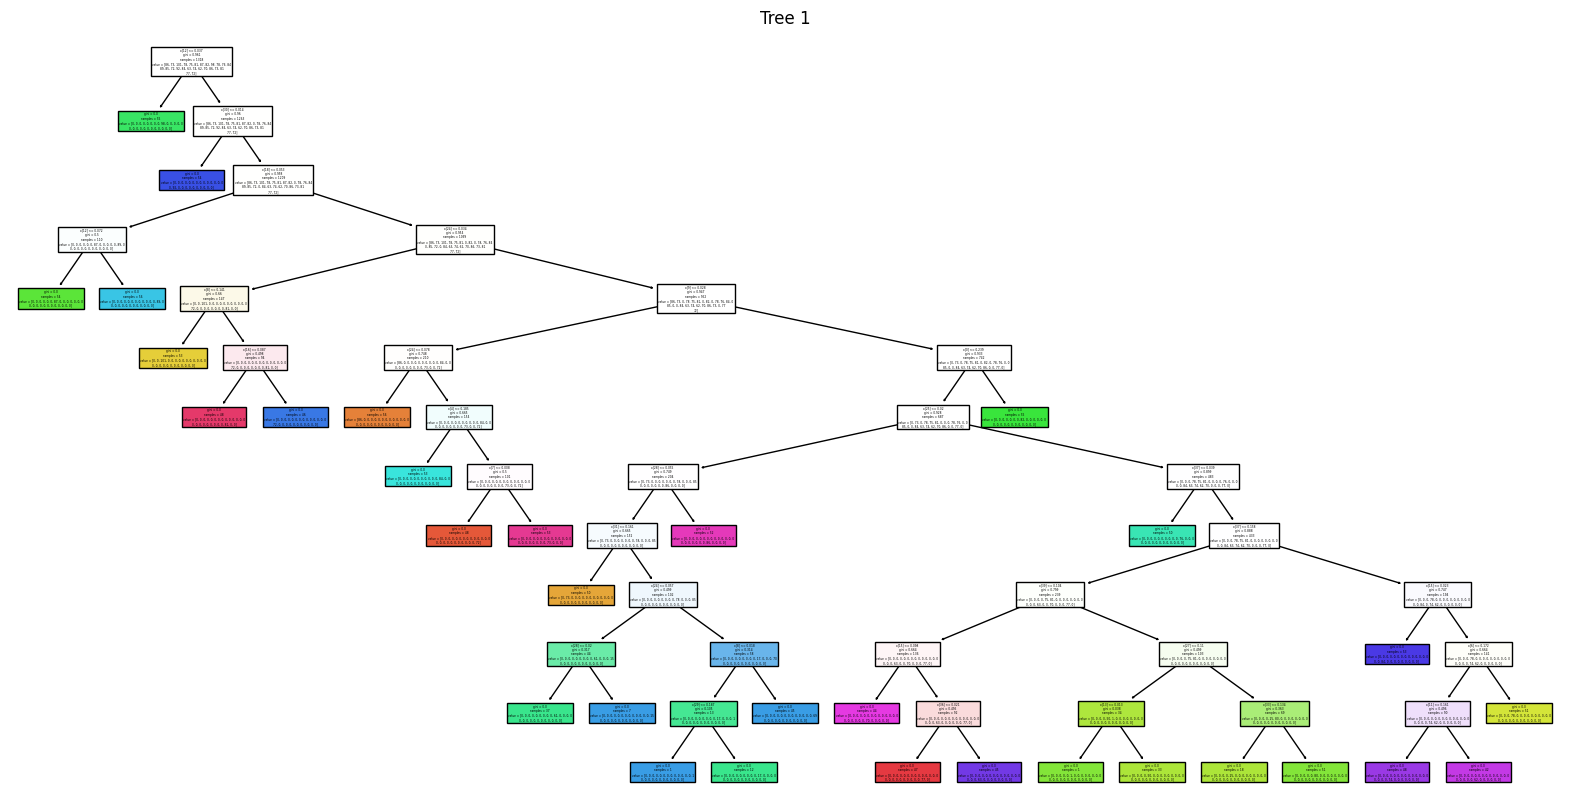

In [9]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the trained RandomForestClassifier model from model.p
with open('./all_models/Random_Forest_Classifier_model.p', 'rb') as f:
    model = pickle.load(f)['model']

# Define the index of the tree you want to visualize
tree_index =0  # Change this to the index of the tree you want to visualize (0 to n_trees-1)

# Check if the specified index is within the range of the number of trees in the forest
if tree_index < len(model.estimators_):
    # Visualize the specified tree
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[tree_index], filled=True)
    plt.title(f'Tree {tree_index + 1}')
    plt.show()
else:
    print(f"Error: Tree index {tree_index} is out of range. There are only {len(model.estimators_)} trees in the forest.")


---

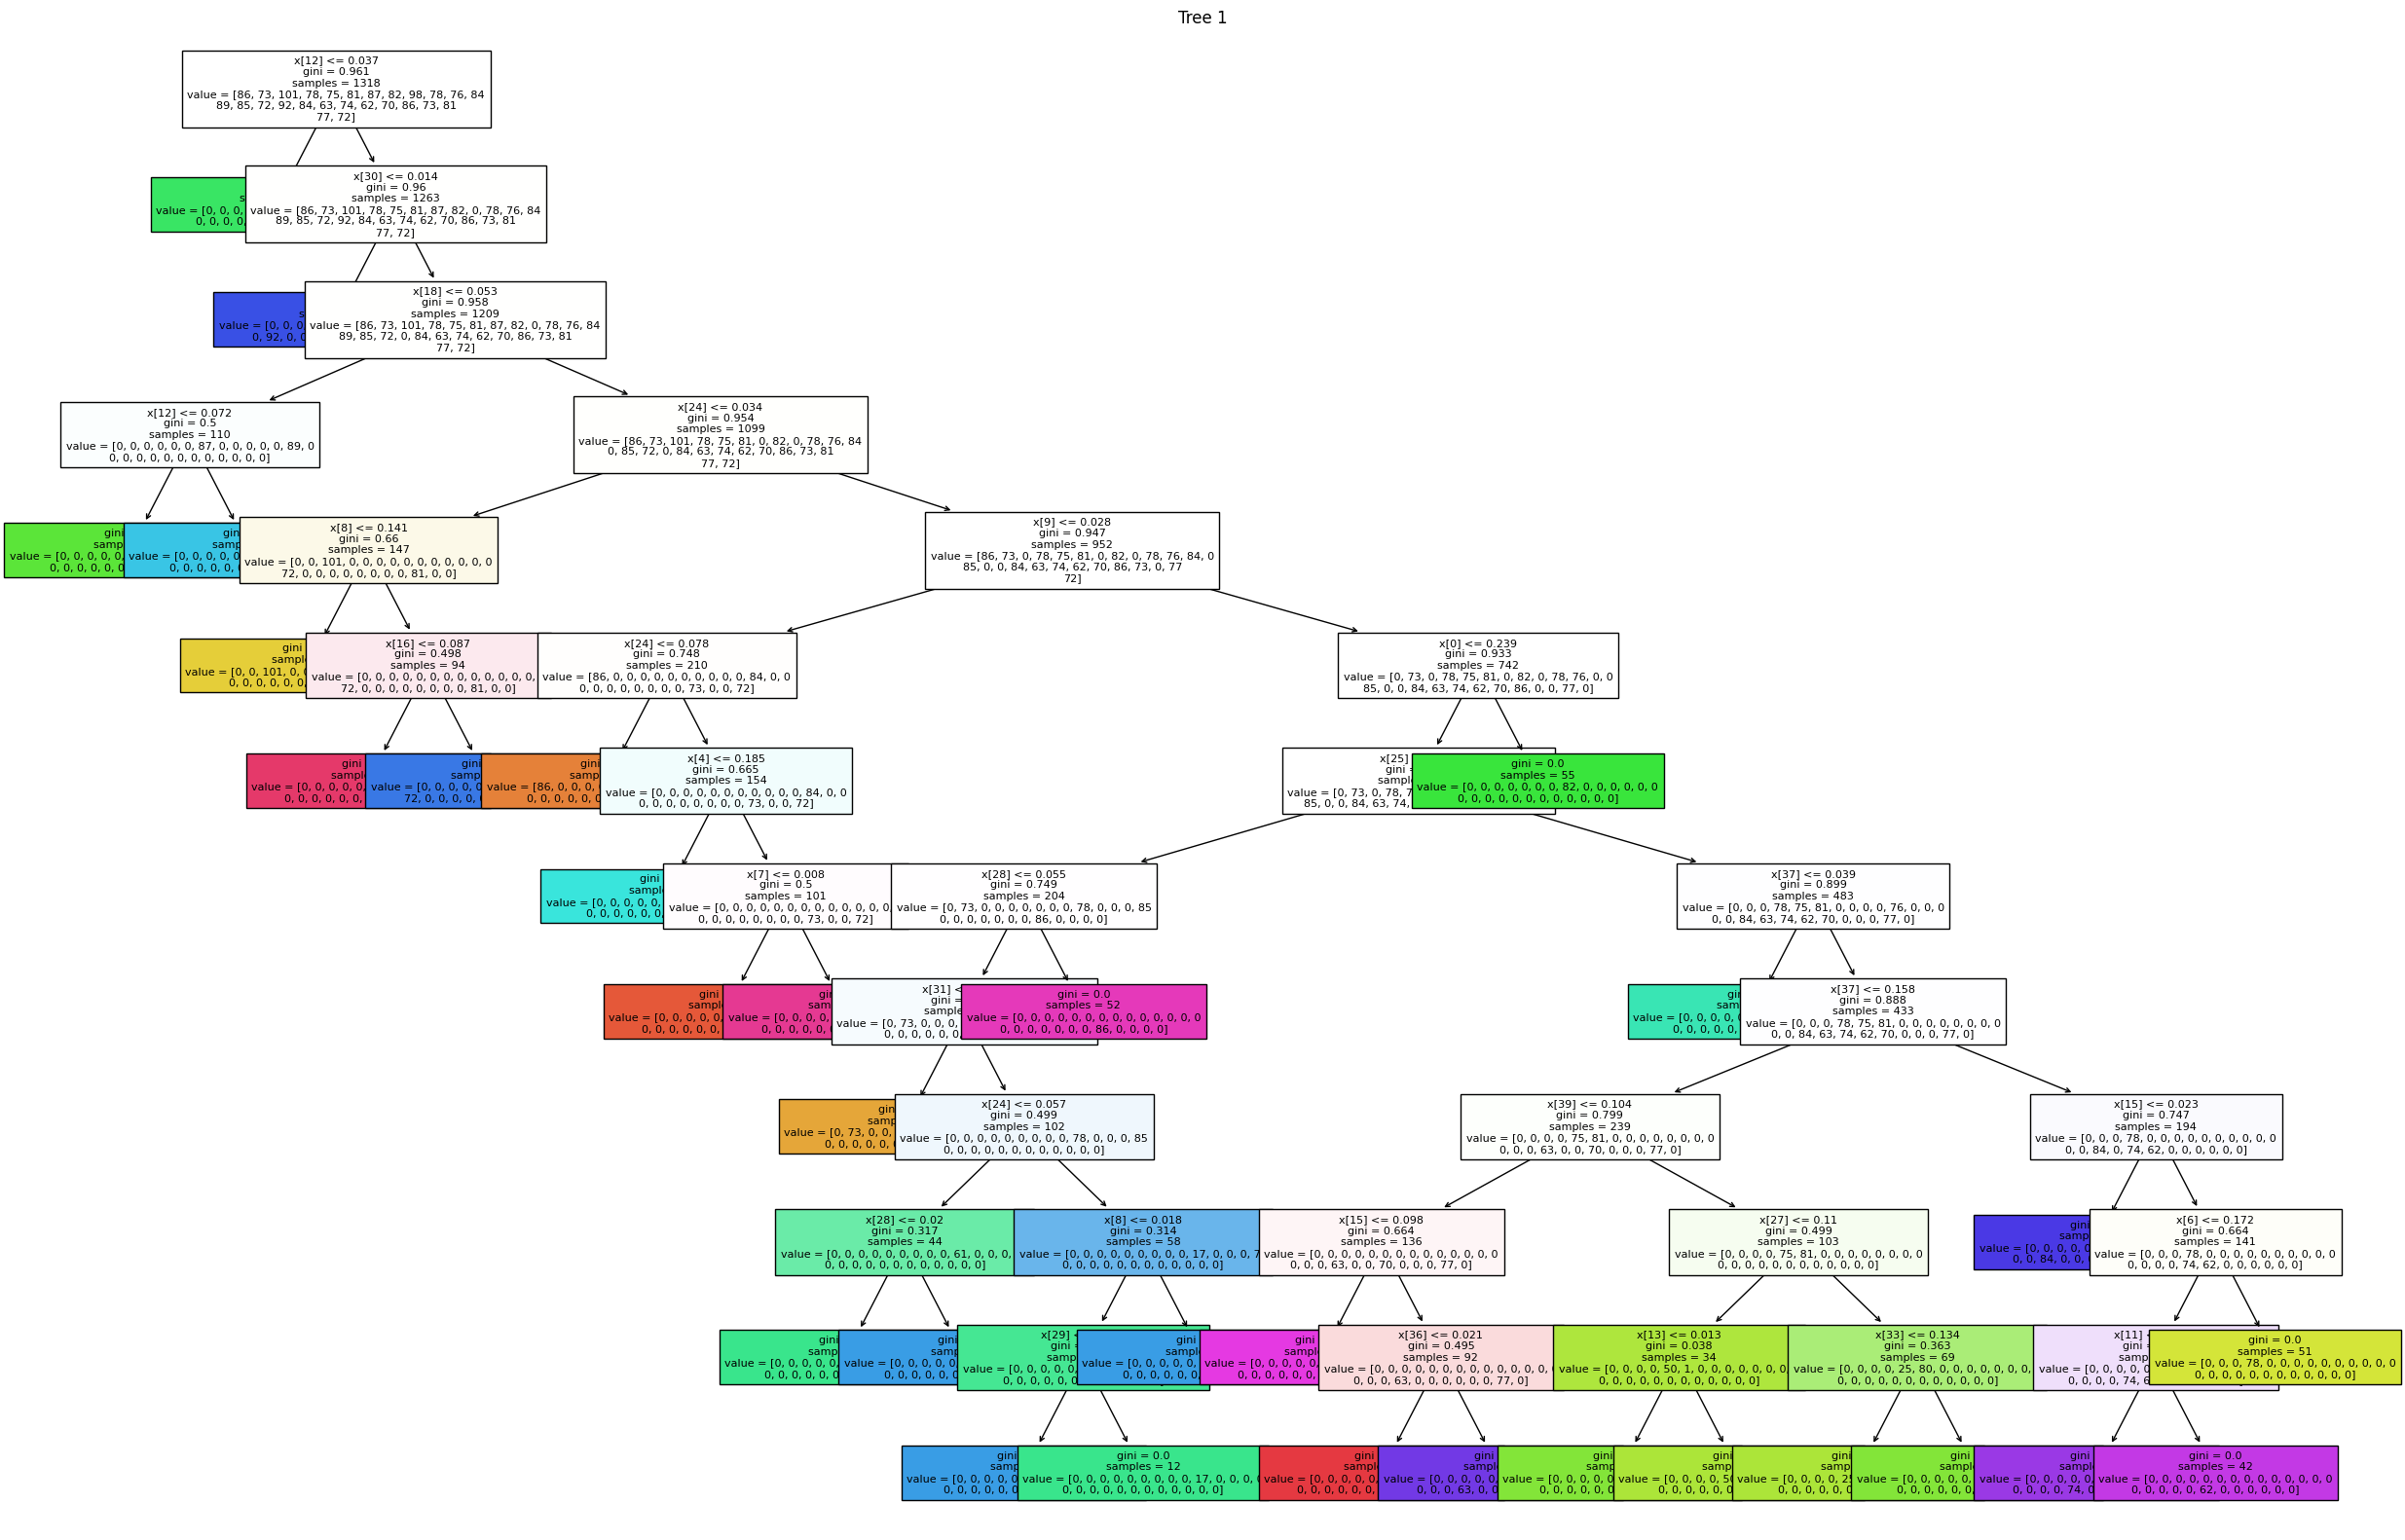

In [6]:
import pickle
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the trained RandomForestClassifier model from model.p
with open('./all_models/Random_Forest_Classifier_model.p', 'rb') as f:
    model = pickle.load(f)['model']

# Define the index of the tree you want to visualize
tree_index = 0  # Change this to the index of the tree you want to visualize

# Check if the specified index is within the range of the number of trees in the forest
if tree_index < len(model.estimators_):
    # Visualize the specified tree with improved image quality
    plt.figure(figsize=(30, 20))
    plot_tree(model.estimators_[tree_index], 
              filled=True, 
              feature_names=None,  # Set to None to use default feature names   
              class_names=None,    # Set to None to use default class names
              fontsize=8)          # Adjust fontsize to make text more visible
    plt.title(f'Tree {tree_index + 1}')
    # make dirs for images
    os.makedirs('./all_trees/', exist_ok=True)
    plt.savefig(f'./all_trees/tree_{tree_index + 1}_visualization.png', dpi=300)  # Save the plot as high-quality PNG
    plt.show()
else:
    print(f"Error: Tree index {tree_index} is out of range. There are only {len(model.estimators_)} trees in the forest.")


The decision-making process of a Random Forest classifier involves several steps internally:

1. **Feature Selection:**
   - Random Forest randomly selects a subset of features from the input dataset for each tree. This process is known as feature selection or feature bagging.
   - The number of features considered at each split point is determined by the `max_features` parameter.

2. **Building Decision Trees:**
   - For each tree in the forest, a bootstrap sample (randomly sampled dataset with replacement) is created from the original dataset.
   - Using the bootstrap sample, a decision tree is constructed. The tree is grown recursively by selecting the best split at each node based on a criterion, usually the Gini impurity or entropy.
   - The `max_depth`, `min_samples_split`, and `min_samples_leaf` parameters control the growth of each individual tree to prevent overfitting.

3. **Voting Mechanism:**
   - During prediction, each tree in the forest independently predicts the class of the input sample.
   - For classification tasks, the mode (most frequent class) of the predictions from all the trees is taken as the final prediction.
   - For regression tasks, the average of the predictions from all the trees is taken as the final prediction.

4. **Bootstrap Aggregating (Bagging):**
   - Random Forest employs an ensemble learning technique called bagging (Bootstrap Aggregating).
   - It creates multiple decision trees trained on different bootstrap samples of the training data.
   - Bagging helps in reducing overfitting and improving the stability and accuracy of the model.

5. **Out-of-Bag (OOB) Evaluation:**
   - Random Forest uses out-of-bag samples to estimate the generalization performance of the model.
   - Out-of-bag samples are the data points that are not included in the bootstrap sample used to train each tree.
   - These samples are used to evaluate the performance of each tree individually without the need for a separate validation set.

Overall, the Random Forest classifier combines the predictions of multiple decision trees to improve the robustness and accuracy of the model, making it a powerful tool for both classification and regression tasks.

---

### This below code is computationally expensive it creates 100 trees from the model, Dont run unless its needed

In [43]:
# import pickle
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Load the trained RandomForestClassifier model from model.p
# with open('model.p', 'rb') as f:
#     model = pickle.load(f)['model']

# # Visualize each tree in the random forest ensemble
# for i, estimator in enumerate(model.estimators_):
#     plt.figure(figsize=(20, 10))
#     plot_tree(estimator[0], filled=True)
#     plt.title(f'Tree {i+1}')
#     plt.show()


---